In [1]:
##importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("Data\\IPL2018_results.xlsx")

In [4]:
df.head()

,scorecard_id,start_date,phase,stadium_name,home_team,away_team,toss_winner,toss_decision,innings1,wickets1,...,adjusted_target_indicator,adjusted_target,team1_overs,team2_overs,mom_player_id,mom_player,scoring_status,result_type,result_margin,winning_team
0,1056637,43197,NaN,"Wankhede Stadium, Mumbai",Mumbai Indians,Chennai Super Kings,Chennai Super Kings,f,165,4,...,n,0,20.0,20,44613,DJ Bravo,live bbb,ww,1,Chennai Super Kings
1,1056638,43198,NaN,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Delhi Daredevils,Kings XI Punjab,f,166,7,...,n,0,20.0,20,170187,KL Rahul,live bbb,ww,6,Kings XI Punjab
2,1056639,43198,NaN,"Eden Gardens, Kolkata",Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,f,176,7,...,n,0,20.0,20,412485,N Rana,live bbb,ww,4,Kolkata Knight Riders
3,1056640,43199,NaN,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Sunrisers,Rajasthan Royals,Sunrisers,f,125,9,...,n,0,20.0,20,15627,S Dhawan,live bbb,ww,9,Sunrisers
4,1056641,43200,NaN,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,f,202,6,...,n,0,20.0,20,119895,SW Billings,live bbb,ww,5,Chennai Super Kings


## Score distribution

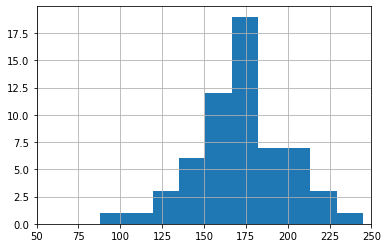

In [18]:
plt.hist(df.innings1, bins=10)
plt.xlim((50, 250))
plt.grid()
plt.show()

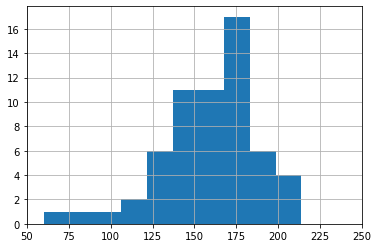

In [17]:
plt.hist(df.innings2, bins=10)
plt.xlim((50, 250))
plt.grid()
plt.show()

Scores for innings2 seem truncated around the 200-215 mark. That is probably a result of the run chase effect - teams batting second either reach the required target and stop, or the target set in the first place was so high that the team batting second collapsed with a very low score.

In [27]:
## comparing the histograms for winners and losers

## segregating the win score from innings 1 & 2
df['winscore']= df[['innings1','innings2']]. max(axis=1)
df['losescore'] = df[['innings1','innings2']]. min(axis=1)
df.head()

,scorecard_id,start_date,phase,stadium_name,home_team,away_team,toss_winner,toss_decision,innings1,wickets1,...,team1_overs,team2_overs,mom_player_id,mom_player,scoring_status,result_type,result_margin,winning_team,winscore,losescore
0,1056637,43197,NaN,"Wankhede Stadium, Mumbai",Mumbai Indians,Chennai Super Kings,Chennai Super Kings,f,165,4,...,20.0,20,44613,DJ Bravo,live bbb,ww,1,Chennai Super Kings,169,165
1,1056638,43198,NaN,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Delhi Daredevils,Kings XI Punjab,f,166,7,...,20.0,20,170187,KL Rahul,live bbb,ww,6,Kings XI Punjab,167,166
2,1056639,43198,NaN,"Eden Gardens, Kolkata",Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,f,176,7,...,20.0,20,412485,N Rana,live bbb,ww,4,Kolkata Knight Riders,177,176
3,1056640,43199,NaN,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Sunrisers,Rajasthan Royals,Sunrisers,f,125,9,...,20.0,20,15627,S Dhawan,live bbb,ww,9,Sunrisers,127,125
4,1056641,43200,NaN,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,f,202,6,...,20.0,20,119895,SW Billings,live bbb,ww,5,Chennai Super Kings,205,202


(0.0, 20.0)

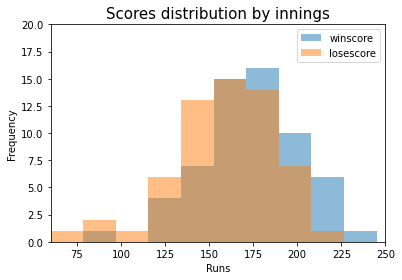

In [32]:
# Now we can plot two histograms together

df[['winscore','losescore']].plot.hist(alpha=0.5,bins=10)
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.title("Scores distribution by innings", fontsize=15)
plt.xlim((60, 250))
plt.ylim((0, 20))

## Studying MI vs CSK match - When did MI lose the match?

#### From our previous analysis of Venue, in Wankhede although both team has almost similar chances but chasing has an edge over batting first
#### CSK won toss and choose to field

In [33]:
match_df = pd.read_excel('Data\\MIvCSK.xlsx')

In [65]:
match_df

,MI_over_no,MI_ball_no,MI_runs_total_end,MI_delivery_no,MI_wicket,CSK_over_no,CSK_ball_no,CSK_runs_total_end,CSK_delivery_no,CSK_wicket
0,0.0,1.0,0.0,1.0,0.0,0,1,0,1,0
1,0.0,2.0,0.0,2.0,0.0,0,2,1,2,0
2,0.0,3.0,0.0,3.0,0.0,0,3,2,3,0
3,0.0,4.0,4.0,4.0,0.0,0,4,3,4,0
4,0.0,5.0,5.0,5.0,0.0,0,5,3,5,0
...,...,...,...,...,...,...,...,...,...,...
119,19.0,4.0,162.0,120.0,0.0,19,1,159,120,0
120,19.0,5.0,164.0,121.0,0.0,19,2,159,121,0
121,19.0,6.0,165.0,122.0,0.0,19,3,159,122,0
122,NaN,NaN,NaN,NaN,NaN,19,4,165,123,0


#### MI has 122 balls means 2 wides or no ball, while CSK has 124 balls and it is showing 19.5 which means they win with one ball remaining

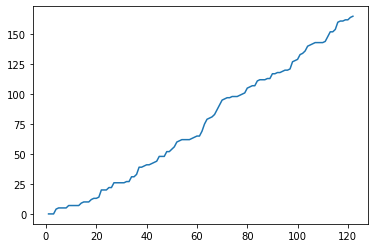

In [66]:
plt.plot(match_df['MI_delivery_no'], match_df['MI_runs_total_end'])
plt.show()

In [67]:
MI_wkt = match_df[match_df['MI_wicket'] > 0]
CSK_wkt = match_df[match_df['CSK_wicket'] > 0]

In [68]:
MI_wkt

,MI_over_no,MI_ball_no,MI_runs_total_end,MI_delivery_no,MI_wicket,CSK_over_no,CSK_ball_no,CSK_runs_total_end,CSK_delivery_no,CSK_wicket
12,2.0,1.0,7.0,13.0,1.0,2,1,16,13,0
23,3.0,6.0,20.0,24.0,1.0,3,6,31,24,0
75,12.0,3.0,98.0,76.0,1.0,12,2,76,76,0
88,14.0,4.0,113.0,89.0,1.0,14,3,103,89,0


In [69]:
CSK_wkt

,MI_over_no,MI_ball_no,MI_runs_total_end,MI_delivery_no,MI_wicket,CSK_over_no,CSK_ball_no,CSK_runs_total_end,CSK_delivery_no,CSK_wicket
21,3.0,4.0,20.0,22.0,0.0,3,4,27,22,1
35,5.0,5.0,33.0,36.0,0.0,5,6,42,36,1
38,6.0,2.0,40.0,39.0,0.0,6,3,42,39,1
51,8.0,3.0,60.0,52.0,0.0,8,3,51,52,1
73,12.0,1.0,98.0,74.0,0.0,11,6,75,74,1
77,12.0,5.0,100.0,78.0,0.0,12,4,83,78,1
79,13.0,1.0,105.0,80.0,0.0,12,6,84,80,1
91,15.0,1.0,118.0,92.0,0.0,14,6,105,92,1
103,16.0,7.0,140.0,104.0,0.0,16,5,118,104,1
118,19.0,3.0,162.0,119.0,0.0,18,6,159,119,1


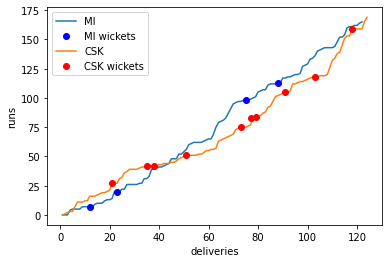

In [85]:
## plotting MI runs and wkts by deliveries
plt.plot(match_df['CSK_delivery_no'], 
         match_df['MI_runs_total_end'], 
         MI_wkt['MI_runs_total_end'], 'bo')

## plotting CSK runs and wkts by deliveries
plt.plot(match_df['CSK_delivery_no'], 
         match_df['CSK_runs_total_end'], 
         CSK_wkt['CSK_runs_total_end'], 'ro')


plt.xlabel('deliveries')
plt.ylabel('runs')
plt.legend(['MI', 'MI wickets', 'CSK', 'CSK wickets'])
